### nber experiments
see
https://sites.google.com/site/patentdataproject/Home/downloads


In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.spatial.distance import cosine
from matplotlib.colors import LogNorm

%matplotlib inline

In [4]:
%load_ext line_profiler

In [5]:
!ls -l

total 4844672
-rw-r--r--  1 ahuxor  staff      21452 19 Aug 22:54 NBER_generality_originality_heatmap.pdf
-rw-r--r--  1 ahuxor  staff       1097 22 Jul 19:34 Untitled.ipynb
drwxr-xr-x  4 ahuxor  staff        136 23 Jul 14:59 Update_to_NBER
-rw-r--r--@ 1 ahuxor  staff   51973915  4 Aug  2010 assignee.dta
-rwxr-xr-x@ 1 ahuxor  staff  236509670 28 Mar  2009 cite76_06.dta
-rw-r--r--  1 ahuxor  staff       1928  8 Aug 12:03 create_pat76_06_citesnum_hjtwt_nclaims_patent.ipynb
-rw-r--r--  1 ahuxor  staff     266567 19 Aug 20:49 des_stats_76_06_assg.ipynb
-rw-r--r--  1 ahuxor  staff      74125 11 Aug 13:21 desc_stats_ cite76_06.ipynb
-rw-r--r--  1 ahuxor  staff       2146 19 Aug 13:25 desc_stats_pat76_06_ipc.ipynb
-rw-r--r--  1 ahuxor  staff     173890 20 Aug 10:25 distance_from_section.ipynb
-rw-rw-rw-@ 1 ahuxor  staff     788072 28 Jul  2010 dynass.dat
-rw-r--r--  1 ahuxor  staff      26181 16 Aug 20:52 getdummy_tests.ipynb
-rw-r--r--  1 ahuxor  staff     726615 20 Aug 10:27 nber_experiments

In [6]:
!head -2 pat76_06_ipc.asc

head: pat76_06_ipc.asc: No such file or directory


In [7]:
pat76_06_ipc_df = pd.read_stata('pat76_06_ipc.dta')

In [8]:
pat76_06_ipc_df.dtypes

appyear             int16
cat               float64
gyear               int16
icl                object
icl_class          object
icl_maingroup     float32
iclnum               int8
nclass            float64
numipc               int8
patent              int32
pdpass            float64
subcat            float64
subclass          float32
uspto_assignee    float64
dtype: object

In [9]:
pat76_06_assg_df = pd.read_stata('pat76_06_assg.dta')

In [10]:
pat76_06_assg_df.sort_values(by='allcites', ascending=False)

,allcites,appyear,asscode,assgnum,cat,cat_ocl,cclass,country,ddate,gday,...,state,status,subcat,subcat_ocl,subclass,subclass1,subclass1_ocl,subclass_ocl,term_extension,uspto_assignee
802010,1804,1986,3.0,1.0,2.0,4.0,347/56,JP,NaT,2,...,,,23.0,49.0,56.000000,56,1,1.0,0,87490.0
538455,1587,1980,3.0,1.0,2.0,4.0,347/56,JP,NaT,31,...,,,23.0,49.0,56.000000,56,1,1.0,0,87490.0
761488,1555,1985,2.0,1.0,3.0,3.0,435/91.2,US,2004-07-28 00:00:00,28,...,CA,,31.0,31.0,91.199997,91.2,91,91.0,0,97235.0
820002,1519,1986,3.0,1.0,2.0,4.0,347/56,JP,NaT,26,...,,,23.0,49.0,56.000000,56,1,1.0,0,87490.0
634740,1482,1982,3.0,1.0,2.0,4.0,347/65,JP,NaT,10,...,,,23.0,49.0,65.000000,65,140,140.0,0,87490.0
761481,1460,1986,2.0,1.0,3.0,3.0,435/6,US,2004-07-28 00:00:00,28,...,CA,,31.0,31.0,6.000000,6,6,6.0,0,97235.0
418936,1453,1980,3.0,1.0,2.0,4.0,347/10,JP,NaT,17,...,,,23.0,49.0,10.000000,10,140,140.0,0,87490.0
386465,1418,1980,3.0,1.0,2.0,4.0,347/57,JP,NaT,26,...,,,23.0,49.0,57.000000,57,140,140.0,0,87490.0
534645,1390,1981,3.0,1.0,2.0,4.0,347/47,JP,1999-05-18 00:00:00,10,...,,,23.0,49.0,47.000000,47,140,140.0,0,87490.0
812739,1015,1985,2.0,1.0,3.0,3.0,606/108,US,NaT,29,...,TX,,32.0,32.0,108.000000,108,343,343.0,0,185985.0


In [11]:
!ls -l

total 4843352
-rw-r--r--  1 ahuxor  staff      21452 19 Aug 22:54 NBER_generality_originality_heatmap.pdf
-rw-r--r--  1 ahuxor  staff       1097 22 Jul 19:34 Untitled.ipynb
drwxr-xr-x  4 ahuxor  staff        136 23 Jul 14:59 Update_to_NBER
-rw-r--r--@ 1 ahuxor  staff   51973915  4 Aug  2010 assignee.dta
-rwxr-xr-x@ 1 ahuxor  staff  236509670 28 Mar  2009 cite76_06.dta
-rw-r--r--  1 ahuxor  staff       1928  8 Aug 12:03 create_pat76_06_citesnum_hjtwt_nclaims_patent.ipynb
-rw-r--r--  1 ahuxor  staff     266567 19 Aug 20:49 des_stats_76_06_assg.ipynb
-rw-r--r--  1 ahuxor  staff      74125 11 Aug 13:21 desc_stats_ cite76_06.ipynb
-rw-r--r--  1 ahuxor  staff       2146 19 Aug 13:25 desc_stats_pat76_06_ipc.ipynb
-rw-r--r--  1 ahuxor  staff     173890 20 Aug 10:25 distance_from_section.ipynb
-rw-rw-rw-@ 1 ahuxor  staff     788072 28 Jul  2010 dynass.dat
-rw-r--r--  1 ahuxor  staff      26181 16 Aug 20:52 getdummy_tests.ipynb
-rw-r--r--  1 ahuxor  staff      49765 20 Aug 10:29 nber_experiments

In [12]:
# note that first few assignees do seem to actually start with an ampersand
junk = pd.read_stata('assignee.dta')
!head -5 assignee.asc

head: assignee.asc: No such file or directory


In [13]:
cite76_06_df = pd.read_stata('cite76_06.dta')


In [14]:
# it looks as if the cited patents do not go back before 1976
# so the lowest cited patent number (earlier?) is 3939271, dated 6 Jan 1976
cite76_06_df.sort_values(by='cited', ascending=True).head()

,citing,cited,ncites7606
0,5135226,3930271,6
1,5592695,3930271,6
2,5621918,3930271,6
3,5624296,3930271,6
4,5675839,3930271,6


In [15]:
len(cite76_06_df)

23650891

In [16]:
cited_patent_nums = cite76_06_df.cited.unique()

In [17]:
len(cited_patent_nums)

2516969

In [18]:
# this patent is for a golfing glove, which itself cites 2 older patents: 2379430 & 2782422
# but if I look for citing = 3939271, I get an empty frame
cite76_06_df[cite76_06_df.citing==3939271]

,citing,cited,ncites7606


In [19]:
# group citation data by cited patent number
grouped_cites = cite76_06_df.groupby(by='cited')
grouped_cites_df = pd.DataFrame(grouped_cites.size().reset_index(name = "Group_Count"))
grouped_cites_df_sorted = grouped_cites_df.sort_values(by='Group_Count', ascending=False)
grouped_cites_df_sorted.head()

,cited,Group_Count
742259,4723129,1804
497379,4463359,1587
704507,4683202,1555
758951,4740796,1519
586651,4558333,1482


In [20]:
aa = grouped_cites_df_sorted.reset_index()[['cited','Group_Count']]
aa.tail()

,cited,Group_Count
2516964,6058129,1
2516965,4192258,1
2516966,6058126,1
2516967,6058123,1
2516968,7118895,1


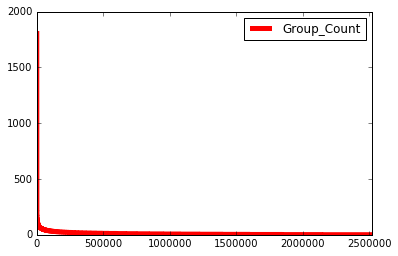

In [21]:
aa.plot(y='Group_Count',c='r',xlim=(-500,2516968),linewidth=5)

In [22]:
# get log of counts
bb = aa[1:]
bb['log_counts'] = np.log10(bb.Group_Count) 
bb['log_index'] = np.log10(bb.index) 

bb.head(15)

/Users/ahuxor/anaconda/lib/python3.4/site-packages/ipykernel/__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()
/Users/ahuxor/anaconda/lib/python3.4/site-packages/ipykernel/__main__.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


,cited,Group_Count,log_counts,log_index
1,4463359,1587,3.200577,0.000000
2,4683202,1555,3.191730,0.301030
3,4740796,1519,3.181558,0.477121
4,4558333,1482,3.170848,0.602060
5,4683195,1460,3.164353,0.698970
6,4345262,1453,3.162266,0.778151
7,4313124,1418,3.151676,0.845098
8,4459600,1390,3.143015,0.903090
9,4733665,1015,3.006466,0.954243
10,5103459,917,2.962369,1.000000


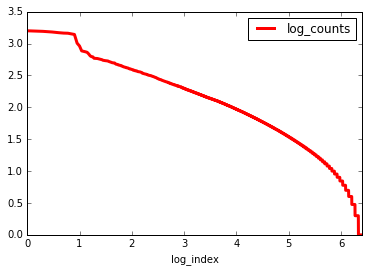

In [23]:
# plot log-log of index against patant counts. Seems to be a shortfall at top end.
bb.plot(x='log_index',y='log_counts',c='r',linewidth=3)

In [24]:
# not a very good zipf law. This may be due to thos at the latter years not having time to accrue citations.
# I should maybe use only the first deciade or so, or use their citation correction factor.
# but need to merge a few datfiles first.

In [25]:
# read in originality and generality measures data, which is only in the Strata9 .dta format
orig_gen_76_06_df = pd.read_stata('orig_gen_76_06.dta')

In [26]:
orig_gen_76_06_df[orig_gen_76_06_df.nciting>100].head()

,general,ncited,nciting,orig,patent,year
197164,0.207468,82,101,0.616832,4373932,1981.0
661362,0.345455,11,137,0.758051,4906475,1988.0
747013,0.514286,21,117,0.320365,4999547,1986.0
751976,0.380952,28,109,0.288481,5004944,1987.0
769496,0.890110,14,129,0.887355,5023891,1989.0


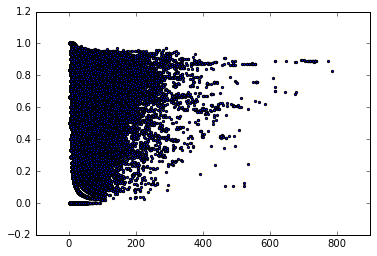

In [27]:
plt.scatter(orig_gen_76_06_df.nciting,orig_gen_76_06_df.orig,marker='.')

In [357]:
o_g_notnull.head()

,general,ncited,nciting,orig,patent,year
9,0.179435,32,3,0.666667,3931349,1974.0
22,0.500000,4,2,1.000000,3965241,1975.0
35,0.800000,6,2,1.000000,3970769,1974.0
41,0.536842,20,2,1.000000,3971877,1975.0
57,NaN,1,2,0.000000,3974168,1974.0


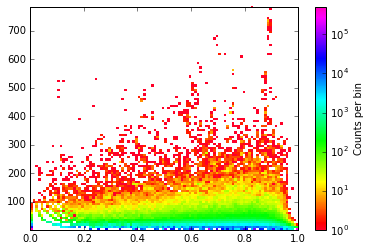

In [29]:
from matplotlib.colors import LogNorm
o_g_notnull = orig_gen_76_06_df[(orig_gen_76_06_df.nciting.notnull()) & (orig_gen_76_06_df.orig.notnull())]

plt.hist2d(o_g_notnull.orig,o_g_notnull.nciting, cmap='gist_rainbow',bins=[100,100],norm = LogNorm())
cb = plt.colorbar()
cb.set_label('Counts per bin')
plt.savefig("/Users/ahuxor/MSc/Thesis_Project/msc_thesis/Figs/orig_ncites_heatmap.pdf", bbox_inches = 'tight')


In [30]:
# looks promising as almost an inverted U-shape
# need to subset data to be from 1976 to 2000 as patents near 2006 
# do not have time to accrue citations
o_g_notnull_76_00 = o_g_notnull[o_g_notnull.year<2001]

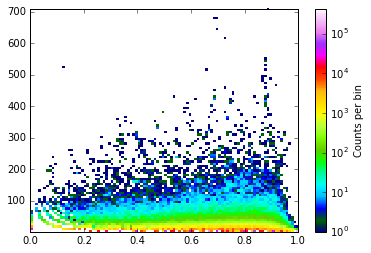

In [31]:
# new plot with data from only 1976 to 200

plt.hist2d(o_g_notnull_76_00.orig,o_g_notnull_76_00.nciting, cmap='gist_ncar',bins=[100,100],norm = LogNorm())
cb = plt.colorbar()
cb.set_label('Counts per bin')
plt.savefig("/Users/ahuxor/MSc/Thesis_Project/msc_thesis/Figs/orig_ncites_76_00_heatmap.pdf", bbox_inches = 'tight')


In [248]:
o_g_notnull_76_00['log_nciting']=np.log10(o_g_notnull_76_00.nciting)
o_g_notnull_76_00.tail()

/Users/ahuxor/anaconda/lib/python3.4/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


,general,ncited,nciting,orig,patent,year,log_nciting
2811939,NaN,0,16,0.541667,7155729,2000.0,1.204120
2811943,NaN,0,84,0.708262,7155734,2000.0,1.924279
2811944,NaN,0,10,0.200000,7155735,1999.0,1.000000
2811953,NaN,0,54,0.712089,7155744,2000.0,1.732394
2811954,NaN,0,15,0.542857,7155745,2000.0,1.176091


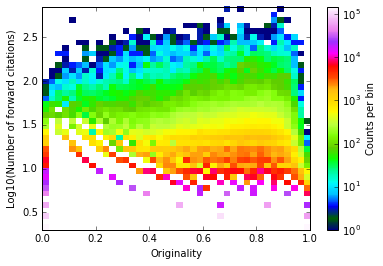

In [249]:
# new plot with data from only 1976 to 2000
# trying to get 
fig = plt.figure(1)
ax = plt.subplot(111)

plt.hist2d(o_g_notnull_76_00.orig,o_g_notnull_76_00.log_nciting, cmap='gist_ncar',bins=[40,40],norm = LogNorm())
cb = plt.colorbar()
cb.set_label('Counts per bin')
ax.set_xlabel('Originality')
ax.set_ylabel('Log10(Number of forward citations)')

plt.savefig("/Users/ahuxor/MSc/Thesis_Project/msc_thesis/Figs/orig_log_ncites_76_00_heatmap.pdf", bbox_inches = 'tight')
plt.show()

In [250]:
# need to get bins of originality to get a boxplot?
# count, division = np.histogram(series)

count, division = np.histogram(o_g_notnull_76_00.orig)
count

array([468876,  30514,  75062, 114591,  70347, 211872, 279885, 175576,
       200812, 324287])

In [252]:
# sort o_g_notnull_76_00 by orig parameter
o_g_notnull_76_00_sorted = o_g_notnull_76_00.sort_values(by='orig')

# get number to ensure equal sized bins
print(len(o_g_notnull_76_00_sorted)/10)

# then divide this into 9 dfs, creating 10 'chunks' of originiality - 0.1 wide bins
temp = np.array_split(o_g_notnull_76_00_sorted, 10)
bin0 = temp[0].nciting.values[:195182]
bin1 = temp[1].nciting.values[:195182]
bin2 = temp[2].nciting.values[:195182]
bin3 = temp[3].nciting.values[:195182]
bin4 = temp[4].nciting.values[:195182]
bin5 = temp[5].nciting.values[:195182]
bin6 = temp[6].nciting.values[:195182]
bin7 = temp[7].nciting.values[:195182]
bin8 = temp[8].nciting.values[:195182]
bin9 = temp[9].nciting.values[:195182]

# make ist of bins for subsequent use
bin_list =[bin0,bin1,bin2,bin3,bin4,bin5,bin6,bin7,bin8,bin9]


195182.2


/Users/ahuxor/anaconda/lib/python3.4/site-packages/ipykernel/__main__.py:16: RuntimeWarning: divide by zero encountered in log10


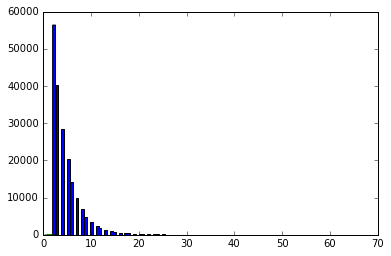

Coefficient: 
 -4.5243641571
Intercept: 
 8.18029718175
R² Value: 
 0.982060419239


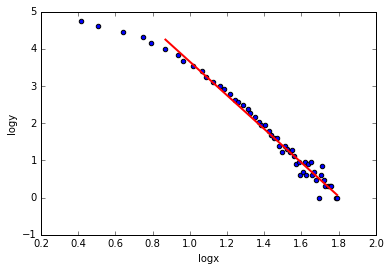

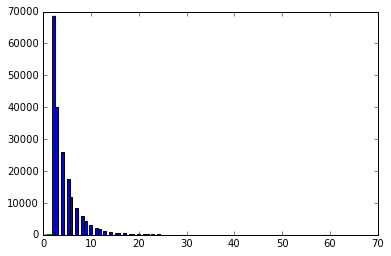

Coefficient: 
 -4.61072883236
Intercept: 
 8.23155820635
R² Value: 
 0.973872864607


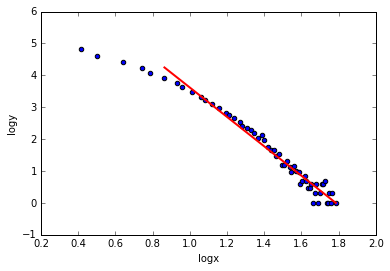

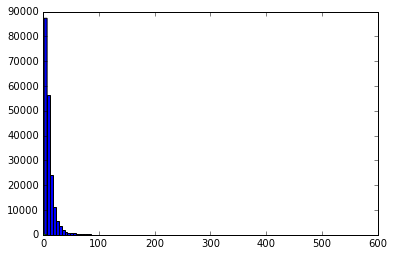

Coefficient: 
 -3.36771956039
Intercept: 
 8.51617876478
R² Value: 
 0.96769368338


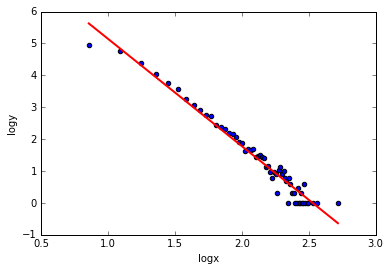

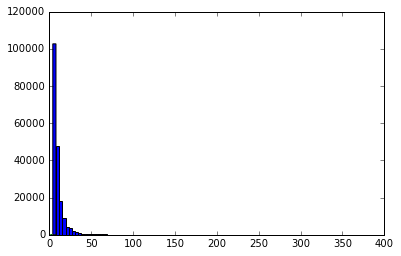

Coefficient: 
 -2.98215996679
Intercept: 
 7.71823133161
R² Value: 
 0.949966880504


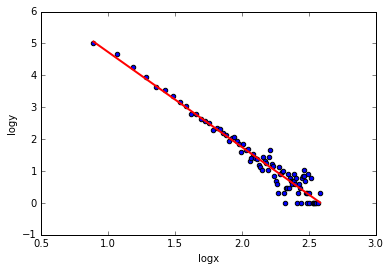

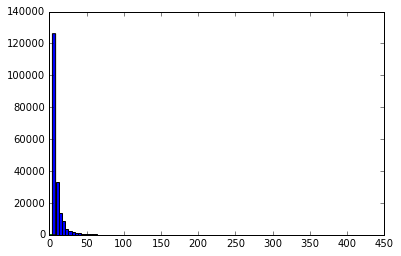

Coefficient: 
 -3.14615258576
Intercept: 
 8.02945092298
R² Value: 
 0.970835520841


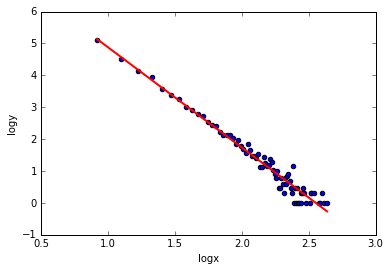

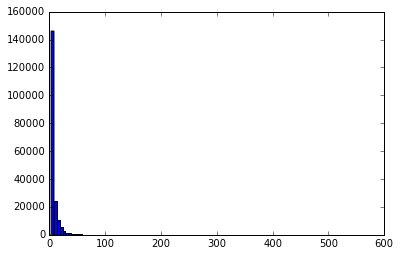

Coefficient: 
 -3.07666363531
Intercept: 
 7.9089693688
R² Value: 
 0.9531602158


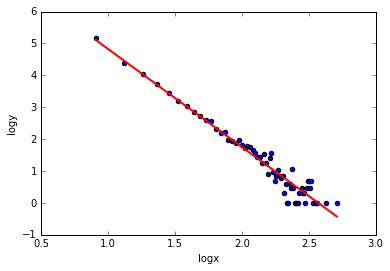

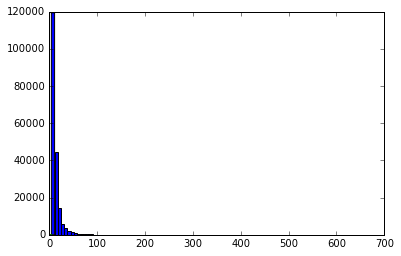

Coefficient: 
 -3.0867823104
Intercept: 
 8.40479678862
R² Value: 
 0.951684051832


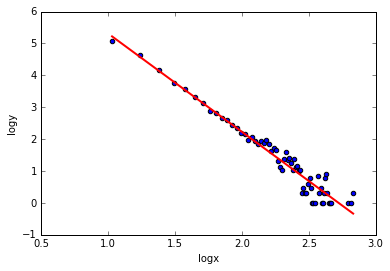

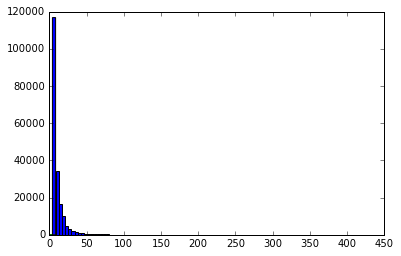

Coefficient: 
 -3.1250961627
Intercept: 
 8.14499764091
R² Value: 
 0.961538362713


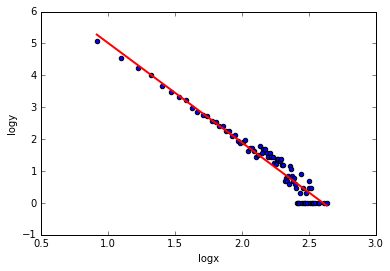

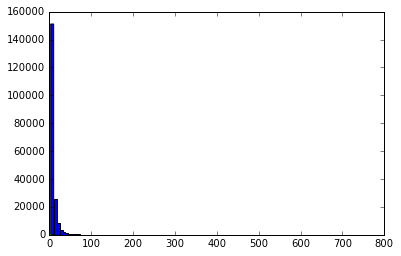

Coefficient: 
 -2.91872797839
Intercept: 
 7.90490380002
R² Value: 
 0.959284178097


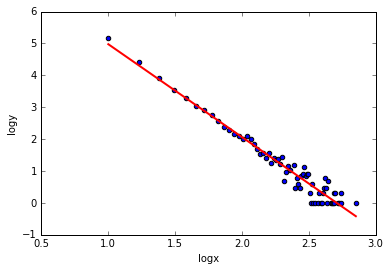

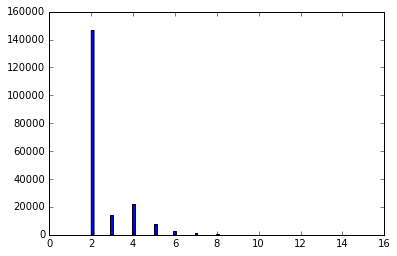

Coefficient: 
 -10.1372482881
Intercept: 
 11.7059052098
R² Value: 
 0.966487795067


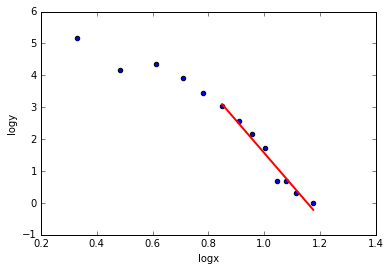

In [266]:
# plot log of plot for one bin and fit power-law to it
# version to do it for all bins in a loop
# this version generates single plots
slope_list = []
intercept_list = []
R_squared_list = []

for a_bin in bin_list:
    hist_data = plt.hist(a_bin,bins=100)
    x = hist_data[1][1:]
    y = hist_data[0][0:]
    len(x)



    logx = np.log10(x)
    logy = np.log10(y)

    plt.plot(logx,logy)
    plt.show()

    # create dataframe from log values
    # as this may help get them into a regression
    logged_df = pd.DataFrame({'logx':logx, 'logy':logy})

    # remove rows with NaN/Inf etc
    clean_logged_df = logged_df.replace([np.inf, -np.inf], np.nan)
    clean_logged_df = clean_logged_df.dropna()

    clean_logged_df_trim = clean_logged_df[clean_logged_df.logx>0.8]

    from sklearn import linear_model
    linear = linear_model.LinearRegression()
    trainX = np.asarray(clean_logged_df_trim.logx[:]).reshape(-1, 1)
    trainY = np.asarray(clean_logged_df_trim.logy[:]).reshape(-1, 1)
    testX = np.asarray(clean_logged_df_trim.logx).reshape(-1, 1)
    testY = np.asarray(clean_logged_df_trim.logy).reshape(-1, 1)
    linear.fit(trainX, trainY)
    linear.score(trainX, trainY)
    slope_list.append(linear.coef_[0][0])
    print('Coefficient: \n', linear.coef_[0][0])
    intercept_list.append(linear.intercept_[0])
    print('Intercept: \n', linear.intercept_[0])
    R_squared_list.append(linear.score(trainX, trainY))
    print('R² Value: \n', linear.score(trainX, trainY))
    predicted = linear.predict(trainX)
    linear.fit(trainX, trainY)



    logged_df.plot('logx', 'logy', kind='scatter')

    plt.plot(testX, linear.predict(testX), color='red', linewidth=2)
    plt.show()
    # plt.savefig("/Users/ahuxor/MSc/Thesis_Project/msc_thesis/Figs/allcites_year_plot.pdf", bbox_inches = 'tight')

/Users/ahuxor/anaconda/lib/python3.4/site-packages/ipykernel/__main__.py:16: RuntimeWarning: divide by zero encountered in log10
/Users/ahuxor/anaconda/lib/python3.4/site-packages/matplotlib/figure.py:397: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


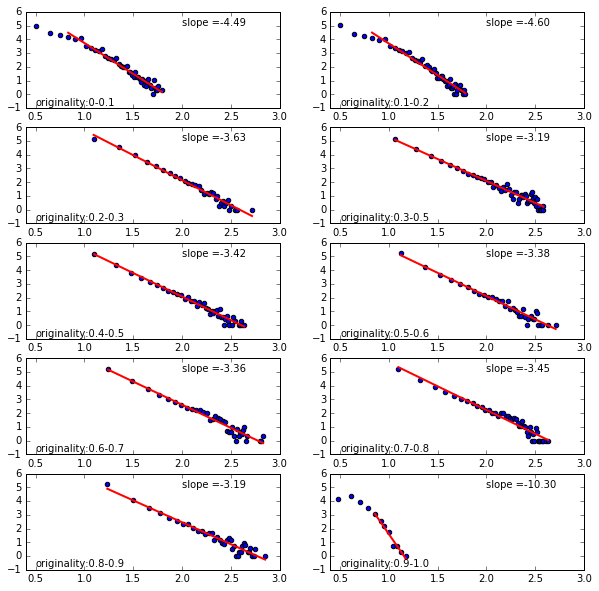

In [332]:
# plot log of plot for one bin and fit power-law to it
# version to do it for all bins in a loop
# version to also create subplots
slope_list = []
intercept_list = []
R_squared_list = []
legend_text1 = ['0-0.1','0.1-0.2','0.2-0.3', '0.3-0.5','0.4-0.5','0.5-0.6','0.6-0.7', \
                '0.7-0.8','0.8-0.9','0.9-1.0']
fig = plt.figure(figsize=(10,10))

for plot_number in range(1,11):
    hist_data = np.histogram(bin_list[(plot_number-1)],bins=50)
    x = hist_data[1][1:]
    y = hist_data[0][0:]
    
    logx = np.log10(x)
    logy = np.log10(y)
    # create dataframe from log values
    # as this may help get them into a regression
    logged_df = pd.DataFrame({'logx':logx, 'logy':logy})

    # remove rows with NaN/Inf etc
    clean_logged_df = logged_df.replace([np.inf, -np.inf], np.nan)
    clean_logged_df = clean_logged_df.dropna()

    clean_logged_df_trim = clean_logged_df[clean_logged_df.logx>0.8]

    from sklearn import linear_model
    linear = linear_model.LinearRegression()
    trainX = np.asarray(clean_logged_df_trim.logx[:]).reshape(-1, 1)
    trainY = np.asarray(clean_logged_df_trim.logy[:]).reshape(-1, 1)
    testX = np.asarray(clean_logged_df_trim.logx).reshape(-1, 1)
    testY = np.asarray(clean_logged_df_trim.logy).reshape(-1, 1)
    linear.fit(trainX, trainY)
    linear.score(trainX, trainY)
    slope_list.append(linear.coef_[0][0])
    #print('Coefficient: \n', linear.coef_[0][0])
    intercept_list.append(linear.intercept_[0])
    #print('Intercept: \n', linear.intercept_[0])
    R_squared_list.append(linear.score(trainX, trainY))
    #print('R² Value: \n', linear.score(trainX, trainY))
    predicted = linear.predict(trainX)
    linear.fit(trainX, trainY)
    
    bin_name = legend_text1[(plot_number-1)]
    slope_text = 'slope =' + format(linear.coef_[0][0],'.2f') 
    ax = fig.add_subplot(5,2,plot_number)
    ax.scatter(logged_df.logx, logged_df.logy)
    ax.plot(testX, linear.predict(testX), color='red', linewidth=2)
    ax.set_xlim([0.4,3])
    ax.text(0.5, -0.8, 'originality:'+bin_name)
    ax.text(2, 5, slope_text)

fig.show()
plt.savefig("/Users/ahuxor/MSc/Thesis_Project/msc_thesis/Figs/slopes_multi_plots.pdf", bbox_inches = 'tight')

In [290]:
np.histogram(bin_list[0],bins=50)

(array([96612, 28424, 20448, 14301,  9816, 11736,  3452,  2487,  1785,
         1296,  1836,   597,   422,   376,   301,   433,   150,   111,
           91,    90,   109,    41,    40,    25,    17,    44,    17,
           19,    13,     8,    13,     5,     9,     4,     8,    13,
            5,     3,     0,     1,    11,     3,     2,     0,     2,
            4,     0,     0,     0,     2]),
 array([  2. ,   3.2,   4.4,   5.6,   6.8,   8. ,   9.2,  10.4,  11.6,
         12.8,  14. ,  15.2,  16.4,  17.6,  18.8,  20. ,  21.2,  22.4,
         23.6,  24.8,  26. ,  27.2,  28.4,  29.6,  30.8,  32. ,  33.2,
         34.4,  35.6,  36.8,  38. ,  39.2,  40.4,  41.6,  42.8,  44. ,
         45.2,  46.4,  47.6,  48.8,  50. ,  51.2,  52.4,  53.6,  54.8,
         56. ,  57.2,  58.4,  59.6,  60.8,  62. ]))

In [267]:
stats = pd.DataFrame(
    {'slope': slope_list,
     'intercept': intercept_list,
     'R_squared': R_squared_list
    })

In [278]:
stats

,R_squared,intercept,slope
0,0.982060,8.180297,-4.524364
1,0.973873,8.231558,-4.610729
2,0.967694,8.516179,-3.367720
3,0.949967,7.718231,-2.982160
4,0.970836,8.029451,-3.146153
5,0.953160,7.908969,-3.076664
6,0.951684,8.404797,-3.086782
7,0.961538,8.144998,-3.125096
8,0.959284,7.904904,-2.918728
9,0.966488,11.705905,-10.137248


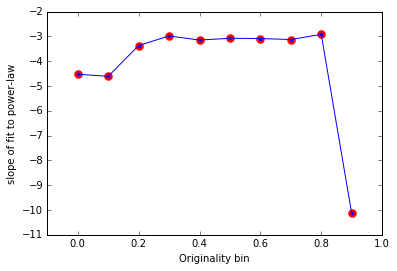

In [391]:
plt.scatter(stats.index.values/10,stats['slope'],marker='o',color='red',linewidth=4.0)
plt.plot(stats.index.values/10,stats['slope'],marker='.',color='blue',linewidth=1.0)


plt.title(' ')
plt.xlabel('Originality bin')
plt.ylabel('slope of fit to power-law')
plt.xlim([-0.1,1.0])

plt.savefig("/Users/ahuxor/MSc/Thesis_Project/msc_thesis/Figs/slopes_aggregate_plot.pdf", bbox_inches = 'tight')
plt.show()

In [361]:
# just in passing.. what are the highly original patents that have low forward citations?
o_g_notnull_76_00_origGT09 = o_g_notnull_76_00[o_g_notnull_76_00.orig > 0.9]
len(o_g_notnull_76_00_origGT09)
o_g_notnull_76_00_origGT09.head()

,general,ncited,nciting,orig,patent,year,log_nciting
22,0.500000,4,2,1.0,3965241,1975.0,0.30103
35,0.800000,6,2,1.0,3970769,1974.0,0.30103
41,0.536842,20,2,1.0,3971877,1975.0,0.30103
66,0.803419,27,2,1.0,3975252,1975.0,0.30103
71,0.666667,3,2,1.0,3975561,1974.0,0.30103


In [383]:
# just in passing.. what are the lowly original patents that have low forward citations?
o_g_notnull_76_00_origLT01 = o_g_notnull_76_00[o_g_notnull_76_00.orig < 0.1]
len(o_g_notnull_76_00_origLT01)
o_g_notnull_76_00_origLT01.head()

,general,ncited,nciting,orig,patent,year,log_nciting
57,NaN,1,2,0.0,3974168,1974.0,0.301030
126,0.361905,15,2,0.0,3980438,1975.0,0.301030
127,0.796923,26,2,0.0,3980459,1975.0,0.301030
128,NaN,1,3,0.0,3980495,1975.0,0.477121
163,0.607143,8,2,0.0,3982686,1976.0,0.301030


In [362]:
# merge above high originality with other datafile to get assignee number
result = pd.merge(o_g_notnull_76_00_origGT09, pat76_06_assg_df, on='patent')

In [384]:
# merge above high originality with other datafile to get assignee number
result_lo = pd.merge(o_g_notnull_76_00_origLT01, pat76_06_assg_df, on='patent')

In [373]:
result.head().T
#rr[rr.years_exp.isnull()])

,0,1,2,3,4
general,0.5,0.8,0.536842,0.803419,0.666667
ncited,4,6,20,27,3
nciting,2,2,2,2,2
orig,1,1,1,1,1
patent,3965241,3970769,3971877,3975252,3975561
year,1975,1974,1975,1975,1974
log_nciting,0.30103,0.30103,0.30103,0.30103,0.30103
allcites,4,6,20,27,3
appyear,1975,1974,1975,1975,1974
asscode,2,3,4,2,1


In [378]:
nan_results = result[result.pdpass.isnull()]
print(len(o_g_notnull_76_00_origGT09))
len(nan_results)
# print proportion of nans in this high originility
len(nan_results)/len(o_g_notnull_76_00_origGT09)

324287


0.17379050039008656

In [385]:
nan_results_lo = result_lo[result_lo.pdpass.isnull()]
len(o_g_notnull_76_00_origLT01)
len(nan_results_lo)
# print proportion of nans in this high originility
len(nan_results_lo)/len(o_g_notnull_76_00_origLT01)

0.1549450174459772

In [378]:
nan_results = result[result.pdpass.isnull()]
len(o_g_notnull_76_00_origGT09)
len(nan_results)
# print proportion of nans in this high originility
len(nan_results)/len(o_g_notnull_76_00_origGT09)

324287


0.17379050039008656

In [380]:
result_alldata = pd.merge(o_g_notnull_76_00, pat76_06_assg_df, on='patent')


In [382]:
nan_result_alldata = result_alldata[result_alldata.pdpass.isnull()]
# print proportion of nans in this all data set
len(nan_result_alldata)/len(o_g_notnull_76_00)

0.1494270481632034

In [238]:
test_nciting_df = pd.DataFrame({'0':bin0nciting, '1':bin1nciting, '2':bin2nciting, \
                                '3':bin3nciting, '4':bin4nciting,'5':bin5nciting, \
                                '6':bin6nciting,'7':bin7nciting, '8':bin8nciting, '9':bin8nciting})

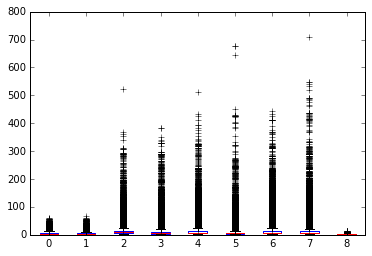

In [221]:
test_nciting_df.plot.box()


In [90]:
test_nciting_df.describe().T

,count,mean,std,min,25%,50%,75%,max
0,195182.0,4.566886,3.371665,2.0,2.0,4.0,6.0,62.0
1,195182.0,4.259891,3.324427,2.0,2.0,3.0,5.0,68.0
2,195182.0,12.126615,12.893648,2.0,6.0,9.0,14.0,522.0
3,195182.0,9.144957,12.119023,4.0,4.0,5.0,10.0,384.0
4,195182.0,12.127189,14.922111,3.0,6.0,8.0,13.0,513.0
5,195182.0,7.562214,11.673573,3.0,3.0,5.0,8.0,678.0
6,195182.0,12.651454,16.521298,4.0,6.0,8.0,13.0,443.0
7,195182.0,11.645372,16.163490,3.0,5.0,8.0,12.0,710.0
8,195182.0,2.580279,1.002008,2.0,2.0,2.0,3.0,15.0


results are not sensible as each bin is distributed in a power law. It may be more sensible to derive the slope of the power law for each bin and see how this changes with originality. One might expect the slope to get shallower with originaility and then steepen again.

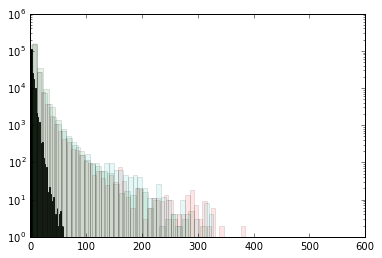

In [79]:
plt.hist(bin1nciting,bins=50)
plt.hist(bin2nciting,bins=50,alpha=0.1)
plt.hist(bin3nciting,bins=50,alpha=0.1)
plt.hist(bin7nciting,bins=50,alpha=0.1)
plt.yscale('log', nonposy='clip')

In [86]:
min(bin3nciting)

4

In [43]:
# get number of claims to see how these work as measure of patent value
nclaims_data = pd.read_csv('pat76_06_citesnum_hjtwt_nclaims_patent.csv')

In [44]:
# merge nclaims data with originality 
print(nclaims_data.head())
print(o_g_notnull_76_00.head())
# pd.merge(df_new, df_n, on='subject_id')
orig_nclaims_df = pd.merge(o_g_notnull_76_00,nclaims_data,on='patent')

    patent  allcites  hjtwt  nclaims
0  3930271         6    1.0      4.0
1  3930272         0    1.0      3.0
2  3930273        20    1.0     24.0
3  3930274         4    1.0      7.0
4  3930275         1    1.0      9.0
     general  ncited  nciting      orig   patent    year  log_nciting
9   0.179435      32        3  0.666667  3931349  1974.0     0.477121
22  0.500000       4        2  1.000000  3965241  1975.0     0.301030
35  0.800000       6        2  1.000000  3970769  1974.0     0.301030
41  0.536842      20        2  1.000000  3971877  1975.0     0.301030
57       NaN       1        2  0.000000  3974168  1974.0     0.301030


In [45]:
orig_nclaims_df['log_nclaims'] = np.log10(orig_nclaims_df.nclaims)
orig_nclaims_df.head()

,general,ncited,nciting,orig,patent,year,log_nciting,allcites,hjtwt,nclaims,log_nclaims
0,0.179435,32,3,0.666667,3931349,1974.0,0.477121,32,1.0,9.0,0.954243
1,0.500000,4,2,1.000000,3965241,1975.0,0.301030,4,1.0,15.0,1.176091
2,0.800000,6,2,1.000000,3970769,1974.0,0.301030,6,1.0,10.0,1.000000
3,0.536842,20,2,1.000000,3971877,1975.0,0.301030,20,1.0,11.0,1.041393
4,NaN,1,2,0.000000,3974168,1974.0,0.301030,1,1.0,23.0,1.361728


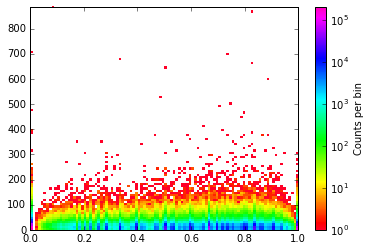

In [46]:
# new plot with data from only 1976 to 200

plt.hist2d(orig_nclaims_df.orig,orig_nclaims_df.nclaims, cmap='gist_rainbow',bins=[100,100],norm = LogNorm())
cb = plt.colorbar()
cb.set_label('Counts per bin')
plt.savefig("/Users/ahuxor/MSc/Thesis_Project/msc_thesis/Figs/orig_nclaims_76_00_heatmap.pdf", bbox_inches = 'tight')


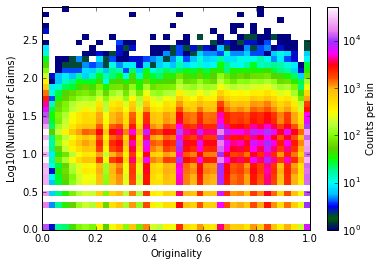

In [66]:
# new plot with data from only 1976 to 200
fig = plt.figure(1)
ax = plt.subplot(111)

plt.hist2d(orig_nclaims_df.orig,orig_nclaims_df.log_nclaims, cmap='gist_ncar',bins=[40,40],norm = LogNorm())
cb = plt.colorbar()
cb.set_label('Counts per bin')
ax.set_xlabel('Originality')
ax.set_ylabel('Log10(Number of claims)')

plt.savefig("/Users/ahuxor/MSc/Thesis_Project/msc_thesis/Figs/orig_log_nclaims_76_00_heatmap.pdf", bbox_inches = 'tight')

plt.show()

In [48]:
orig_nclaims_df.head()

,general,ncited,nciting,orig,patent,year,log_nciting,allcites,hjtwt,nclaims,log_nclaims
0,0.179435,32,3,0.666667,3931349,1974.0,0.477121,32,1.0,9.0,0.954243
1,0.500000,4,2,1.000000,3965241,1975.0,0.301030,4,1.0,15.0,1.176091
2,0.800000,6,2,1.000000,3970769,1974.0,0.301030,6,1.0,10.0,1.000000
3,0.536842,20,2,1.000000,3971877,1975.0,0.301030,20,1.0,11.0,1.041393
4,NaN,1,2,0.000000,3974168,1974.0,0.301030,1,1.0,23.0,1.361728


In [49]:
o_g_notnull.head()

,general,ncited,nciting,orig,patent,year
9,0.179435,32,3,0.666667,3931349,1974.0
22,0.500000,4,2,1.000000,3965241,1975.0
35,0.800000,6,2,1.000000,3970769,1974.0
41,0.536842,20,2,1.000000,3971877,1975.0
57,NaN,1,2,0.000000,3974168,1974.0


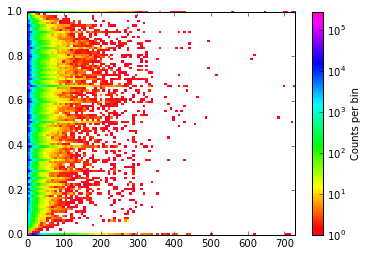

In [50]:
o_g_2_notnull = orig_gen_76_06_df[(orig_gen_76_06_df.nciting.notnull()) & (orig_gen_76_06_df.general.notnull())]

plt.hist2d(o_g_2_notnull.nciting,o_g_2_notnull.general, cmap='gist_rainbow',bins=[100,100],norm = LogNorm())
cb = plt.colorbar()
cb.set_label('Counts per bin')



In [51]:
orig_gen_76_06_df.head()
orig_gen_76_06_df_gen_notnull = orig_gen_76_06_df[orig_gen_76_06_df.general.notnull()]
len(orig_gen_76_06_df_gen_notnull)

2142036

In [52]:
# percetage of orig_gen data with active generality measures
2142036/3154980

0.6789380598292224

In [53]:

orig_gen_76_06_df_orig_notnull = orig_gen_76_06_df[orig_gen_76_06_df.orig.notnull()]
len(orig_gen_76_06_df_orig_notnull)

2469808

In [54]:
# percetage of orig_gen data with active originality measures
2469808/3154980

0.7828284172958307

In [55]:
# get proportion of patent with both active genarality and originality measures.
orig_gen_76_06_df_genorig_notnull = orig_gen_76_06_df[(orig_gen_76_06_df.general.notnull())&(orig_gen_76_06_df.orig.notnull())]
len(orig_gen_76_06_df_genorig_notnull)


1603141

In [56]:
# percetage of orig_gen data with active originality and generality measures
1603141/3154980

0.5081303209529062

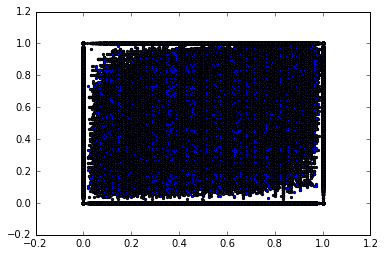

In [57]:
orig_gen_76_06_df_genorig_notnull
plt.scatter(orig_gen_76_06_df_genorig_notnull.general,orig_gen_76_06_df_genorig_notnull.orig,marker='.')

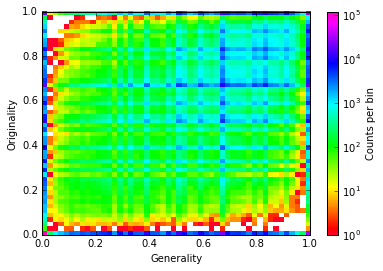

In [58]:
plt.hist2d(orig_gen_76_06_df_genorig_notnull.general, orig_gen_76_06_df_genorig_notnull.orig, bins=[50,50], cmap='gist_rainbow',norm = LogNorm())
cb = plt.colorbar()
cb.set_label('Counts per bin')
plt.xlabel('Generality')
plt.ylabel('Originality')
# plt.title('Number density: generality against orginality')
plt.savefig("NBER_generality_originality_heatmap.pdf", bbox_inches = 'tight', pad_inches = 0.1)

In [59]:
# MAIN
# read in main data file in the Strata9 .dta format
!date
pat76_06_assg_df = pd.read_stata('pat76_06_assg.dta')
!date

Sun 20 Aug 2017 10:31:21 BST


KeyboardInterrupt: 

In [ ]:
pat76_06_assg_df.head().T

In [ ]:
pat76_06_assg_df['adjusted_cites'] = pat76_06_assg_df.allcites * pat76_06_assg_df.hjtwt
pat76_06_assg_df.plot(x='gyear',y='adjusted_cites')

In [ ]:
len(pat76_06_assg_df)

In [ ]:
!date
print(len(pat76_06_assg_df.pdpass))
!date

In [ ]:
!date
unique_assignees = pat76_06_assg_df.pdpass.unique()
print(len(unique_assignees))
!date

In [ ]:
# get the records for those patents where the assignee is NaN
nan_pdpasses = pat76_06_assg_df[pat76_06_assg_df.pdpass.isnull()]

In [ ]:
len(nan_pdpasses)

In [ ]:
nan_pdpasses.tail().T

In [ ]:
grouped = pat76_06_assg_df.groupby(by='pdpass')
grouped_df = pd.DataFrame(grouped.size().reset_index(name = "Group_Count"))
grouped_df_sorted = grouped_df.sort_values(by='Group_Count', ascending=False)
grouped_df_sorted.head()

In [ ]:

xx = grouped_df_sorted.reset_index()[['pdpass','Group_Count']]
xx.head()

In [ ]:
xx.plot(y='Group_Count',xlim=(-10,1500),ylim=(0,50000),c='r',linewidth=5)

In [ ]:
# get log of counts
yy = xx[1:]
yy['log_counts'] = np.log10(yy.Group_Count) 
yy['log_index'] = np.log10(yy.index) 

yy.head(15)

In [ ]:
# how many assignees only have 1 patent?
len(xx[xx.Group_Count ==1])

In [ ]:
# plot log-log of index against patant counts. Seems to be a shortfall at top end.
yy.plot(x='log_index',y='log_counts',c='r',linewidth=5)

In [ ]:
major_assignees_100_df = grouped_df_sorted[0:100]
major_assignees_100_df
major_assignees_100_se = major_assignees_100_df.pdpass
major_assignees_100_se[0:10]

In [ ]:
# need to convert major_assignees_100_se from floats to integers
major_assignees_100_se = major_assignees_100_se.astype(int)
major_assignees_100_se.values

In [ ]:
# get subset of pat76_06_assg_df win which the pdpass is equal to one of those in major_assignees_100_se
# df[df['A'].isin([3, 6])]
pat76_06_top100_assignees = pat76_06_assg_df[pat76_06_assg_df['pdpass'].isin(major_assignees_100_se.values)]

In [ ]:
pat76_06_top100_assignees.head().T

In [ ]:
len(pat76_06_top100_assignees.icl_class.unique())

In [ ]:
# read is assignee names datafile
# note that using dta file partly as the asc file has some formatting error asscoiated.
assignee_names = pd.read_stata('assignee.dta')



In [ ]:
assignee_names[assignee_names.pdpass==10518134]

In [ ]:
assignee_names.head(100)

what are all the ampersands at the start of the top of this file? Are they real or an error?

In [ ]:
assignees_groupedby_pdpass = assignee_names.groupby(by='pdpass')
assignees_groupedby_pdpass.count()
# grouped_df = pd.DataFrame(grouped.size().reset_index(name = "Group_Count"))
assignees_grouped_df = pd.DataFrame(assignees_groupedby_pdpass.size().reset_index(name = "Group_Count"))
# grouped_df_sorted = grouped_df.sort_values(by='Group_Count', ascending=False)
assignees_grouped_df_sorted = assignees_grouped_df.sort_values(by='Group_Count', ascending=False)

assignees_grouped_df_sorted.head()



In [ ]:
# what is the pdpass=-19842?
# all are cod = '05 Foreign individual', none are not that ...
assignee_names[(assignee_names.pdpass==-19842) & (assignee_names.cod !='05 Foreign individual')]

In [ ]:
# what is the pdpass=-0067050? with the next greatest (119) entries
# all are appear to be version of (misspellings?) of Mitsubushi
assignee_names[(assignee_names.pdpass==10067050)]

In [ ]:
# what is the pdpass=10126157? with the next greatest (115) entries
# all are appear to be version of (misspellings?) of Fraunhofer
assignee_names[(assignee_names.pdpass==10126157)]

In [ ]:
# what is the pdpass=10083419? with the next greatest (also 115) entries
# all are appear to be version of (misspellings?) of IBM
assignee_names[(assignee_names.pdpass==10083419)]

above has a problem or does it? (the negative pdpass values must be the non-utlity patents, I assume...See the matchdoc description.


In [ ]:
groupedby_pdpdass = pat76_06_assg_df.groupby(by='pdpass')

groupedby_pdpdass.head().T

In [ ]:
!date
unique_icl_class = pat76_06_assg_df.icl_class.unique()
print(len(unique_icl_class))
!date

In [ ]:
# create dataframe with just assignees and main ipc class
assignees_ipc_class_df = pat76_06_assg_df[['pdpass','patent','icl_class','icl_maingroup']]

In [ ]:
assignees_ipc_class_df

In [ ]:
assignees_ipc_class_df.merged_icl[0:1]

In [ ]:
# create merged ipc class from two components
assignees_ipc_class_df['merged_icl'] = (assignees_ipc_class_df.icl_class + str(assignees_ipc_class_df.icl_maingroup))

In [ ]:
import networkx as nx

In [ ]:
test = assignees_ipc_class_df[:10000]

In [ ]:
G=nx.from_pandas_dataframe(test, source='pdpass', target='icl_class', edge_attr='patent')

In [ ]:
# G=nx.from_pandas_dataframe(assignees_ipc_class_df, source='pdpass', target='icl_class', edge_attr='patent')

In [ ]:
!date
nx.draw(G,node_size=5)
!date

In [ ]:
nx.graph_clique_number(G)

In [ ]:
# this is my starting dataframe for now, with the top 100 assignees.
pat76_06_top100_assignees.head()

In [ ]:

# now group this new starter dataframe, by both assignee and by icl_class
test = pat76_06_top100_assignees.groupby(by=['pdpass','icl_class'])
test_df = pd.DataFrame(test.size().reset_index())




In [ ]:
len(pat76_06_top100_assignees.pdpass.unique())

problem with above is just that it does not include those classes with zero entry

In [ ]:
test_df.head()

In [ ]:
all_icl_class = all_icl_class.tolist
type(all_icl_class)

In [ ]:

# need list of ALL icl_class'es 
all_icl_class = test_df.icl_class.unique()
len(all_icl_class)
# create empty list zeros of this length
a = [0] * len(all_icl_class)
# create dataframe of these names and zeros
dfxx = pd.DataFrame({'icl_class':all_icl_class, 'patents':a})
dfxx.head()
junk = dfxx.copy()

In [ ]:
# lets take first assignee (IBM) = 10030628
ibm_classes = test_df[test_df.pdpass == 10030628]
print(ibm_classes.head())
ibm_classes.dtypes

In [ ]:
patassg_df = pd.read_stata('patassg.dta')

In [ ]:
patassg_df.head()
len(patassg_df)

In [ ]:
utility_patents = patassg_df[patassg_df.ptype=='0']

In [ ]:
len(utility_patents)

In [ ]:
utility_patents.head()

In [ ]:
grouped_utility_patents = utility_patents.groupby(by='patnum')
grouped_utility_patents_df = pd.DataFrame(grouped_utility_patents.size().reset_index(name = "Group_Count"))
grouped_utility_patents_df_sorted = grouped_utility_patents_df.sort_values(by='Group_Count', ascending=False)


In [ ]:
grouped_utility_patents_df_sorted.head()
len(grouped_utility_patents_df_sorted[grouped_utility_patents_df_sorted.Group_Count==1])

In [ ]:
len(grouped_utility_patents_df_sorted[grouped_utility_patents_df_sorted.Group_Count==2])

In [ ]:
!ls

In [ ]:
# load in IPC classification data
pat76_06_ipc_df = pd.read_stata('pat76_06_ipc.dta')


In [ ]:
pat76_06_ipc_df.head()

In [ ]:
pat76_06_ipc_df[pat76_06_ipc_df.pdpass==10030581].T

In [ ]:
# /Users/ahuxor/MSc/Thesis_Project/Data/patentsView
!ls -l /Users/ahuxor/MSc/Thesis_Project/Data/patentsView

In [ ]:
figures_df = pd.read_csv('/Users/ahuxor/MSc/Thesis_Project/Data/patentsView/figures.tsv',sep='\t')

In [ ]:
len(figures_df)

In [ ]:
figures_df.num_figures.max()

In [ ]:
figures_df[figures_df.num_figures==1].head()

In [ ]:
!date
# now try and get vectors for each assignee of the number of patents they hols in each icl_class

# create final dataframe to hold results, starting with all classes as first column
feature_vectors_df = pd.DataFrame({'icl_class' : unique_icl_class})

# first get list of (unique) assignees (try first five first to test code)
test_range = unique_assignees[0:100]
# then for each one of them, 
for assignee in test_range:
    # look at all the patents they have
    temp = pat76_06_assg_df[pat76_06_assg_df.pdpass==assignee].icl_class
    icl_codes_in_current = temp.values
    #  and count instances of these
    n = len(unique_icl_class)
    icl_codes_per_assignee_vector = [0] * n 
    for m in range(0,n):
        current_icl_class = unique_icl_class[m]
        counted = list(icl_codes_in_current).count(current_icl_class)
        icl_codes_per_assignee_vector[m] = counted
        col_name_used = assignee.astype(str)
        feature_vectors_df[col_name_used]=icl_codes_per_assignee_vector
!date

In [ ]:
print(len(feature_vectors_df))
feature_vectors_df.head()


In [ ]:
# COPY OF ABOVE CELL TO TRY AND VECTORISE FOR-LOOPS
!date
# now try and get vectors for each assignee of the number of patents they hols in each icl_class

# create final dataframe to hold results, starting with all classes as first column
feature_vectors_df = pd.DataFrame({'icl_class' : unique_icl_class})

# first get list of (unique) assignees (try first five first to test code)
test_range = unique_assignees[0:10]
# then for each one of them, 
for assignee in test_range:
    # look at all the patents they have
    temp = pat76_06_assg_df[pat76_06_assg_df.pdpass==assignee].icl_class
    icl_codes_in_current = temp.values
    #  and count instances of these
    n = len(unique_icl_class)
    icl_codes_per_assignee_vector = [0] * n 
#    for m in range(0,n):
#        current_icl_class = unique_icl_class[m]
#        counted = list(icl_codes_in_current).count(current_icl_class)
#        icl_codes_per_assignee_vector[m] = counted
#        col_name_used = assignee.astype(str)
#        feature_vectors_df[col_name_used]=icl_codes_per_assignee_vector
    icl_codes_per_assignee_vector = map(lambda x,y: x+y, xs, ys))
!date

In [ ]:
icl_codes_in_current

In [ ]:
feature_vectors_df.head()

In [ ]:
len(unique_assignees)

In [ ]:
(223959*3)/(60*60)

In [ ]:
!date
print(1-cosine(feature_vectors_df["10030276.0"], feature_vectors_df["10699376.0"]))
!date

In [ ]:
feature_vectors_df.head()

In [ ]:
a = feature_vectors_df.drop(0,axis=1)
a.head()


In [ ]:
assignee_array = feature_vectors_df.columns.values
assignee_array[1]

In [ ]:
# go through each column header and compare it to the first by cosine similarity
# NOTE: does not like NaN, so clear these out - if not useful

# set number of patents available
pnum = 1000
# create a matrix to hold results
cos_ang_mat = np.zeros((pnum,pnum))
for i in range(1,pnum):
    tempi = assignee_array[i]
    for j in range(1,pnum):
        tempj = assignee_array[j]
        cos_similarity = 1-cosine(feature_vectors_df[tempi], feature_vectors_df[tempj])
        cos_ang_mat[i,j] = cos_similarity
        # print(cos_sim)
        if (cos_similarity>0.95) & (tempi!=tempj):
            print('close for ',tempi,tempj,' with cos_ang = ',cos_similarity)


In [ ]:
patent_ids = feature_vectors_df.columns.values[1:]
patent_ids

In [ ]:
cos_ang_mat_df = pd.DataFrame(cos_ang_mat)
cos_ang_mat_df.columns = patent_ids
cos_ang_mat_df.set_index(patent_ids, inplace=True)
cos_ang_mat_df

In [ ]:
cos_ang_mat_df[cos_ang_mat_df>0.9]

In [ ]:
# these two assignees have a cos-ang, see above, of 0.938
print(assignee_names[assignee_names.pdpass==10172187])
print(assignee_names[assignee_names.pdpass==10030281])

In [ ]:
# these two assignees have a cos-ang, see above, of 0.972
print(assignee_names[assignee_names.pdpass==11073260])
print(assignee_names[assignee_names.pdpass==10140808])
# could these basically all be an array of zeros?!
# no - see cell below

In [ ]:
# these two assignees have a cos-ang, see above, of 0.9906
print(assignee_names[assignee_names.pdpass==10780383])
print('-----')
print(assignee_names[assignee_names.pdpass==10401313])


In [ ]:
# these two assignees have a cos-ang, see above, of 0.9886
print(assignee_names[assignee_names.pdpass==10109257])
print(assignee_names[assignee_names.pdpass==10198901])


In [ ]:
# these two assignees have a cos-ang, of 1.0
print(assignee_names[assignee_names.pdpass==10030357])
print(assignee_names[assignee_names.pdpass==10030383])
# could these basically all be an array of zeros?!


In [ ]:
feature_vectors_df.head()

In [ ]:
# close for  10030357.0 10030383.0  with cos_ang =  1.0
feature_vectors_df['10030383.0']
# note that note all zeros though?

In [ ]:
type(feature_vectors_df['10030383.0'])

In [ ]:
# get patents for specific assignee
x = pat76_06_assg_df[pat76_06_assg_df.pdpass ==10198901]
x.T

In [ ]:
x[(x.icl_class!='G06F') & (x.icl_class=='G03C')].T

In [ ]:
x[(x.icl_class!='G06F')].icl_class.T

In [390]:
# try and recreate the originality measure from a patent in middle of sample (so not truncated either side)
o_g_notnull_76_00[o_g_notnull_76_00.year==1990].head().T


,648230,672247,678060,680094,681869
general,6.666666e-01,3.768116e-01,5.494253e-01,4.000000e-01,9.000000e-01
ncited,3.000000e+00,2.400000e+01,3.000000e+01,5.000000e+00,5.000000e+00
nciting,3.000000e+00,1.000000e+01,4.000000e+00,3.000000e+00,3.000000e+00
orig,6.666666e-01,5.111111e-01,0.000000e+00,9.999999e-01,6.666666e-01
patent,4.892236e+06,4.918376e+06,4.924683e+06,4.926909e+06,4.928843e+06
year,1.990000e+03,1.990000e+03,1.990000e+03,1.990000e+03,1.990000e+03
log_nciting,4.771213e-01,1.000000e+00,6.020600e-01,4.771213e-01,4.771213e-01


In [ ]:
# so  patent 4924683  has an originality of zero!
